## DBSCAN
(Density Based Spatial Clustering of Applications with Noise)


- 간단하고 직관적인 알고리즘으로 되어 있음에도 
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능한 알고리즘


DBSCAN을 구성하는 가장 중요한 두 가지 파라미터
- 입실론 주변 영역 (epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수


### 데이터 포인트 유형
- 입실론 주변 영역 내에 포함된느 최소 데이터 개수 충족 여부에 따라 구분
- 핵심 포인트(Core Point)
- 이웃 포인트(Neighbor Point)
- 경계 포인트(Border Point)
- 잡음 포인트(Noise Point)

- 핵심 포인트
    - 주변 영역 내에서 최소 데이터 개수 이상의 타 데이터를 가지고 있는 데이터
    - 자신 : 핵심 포인트
    - 타 데이터 : 이웃 포인트
- 이웃 포인트
    - 주변 영역 내에 위치한 타 데이터
    
- 경계 포인트
    - 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만
    - 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
    
- 잡음 포인트
    - 최소 데이터 개수 이상의  이웃 포인트를 가지고 있지 않으며
    - 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

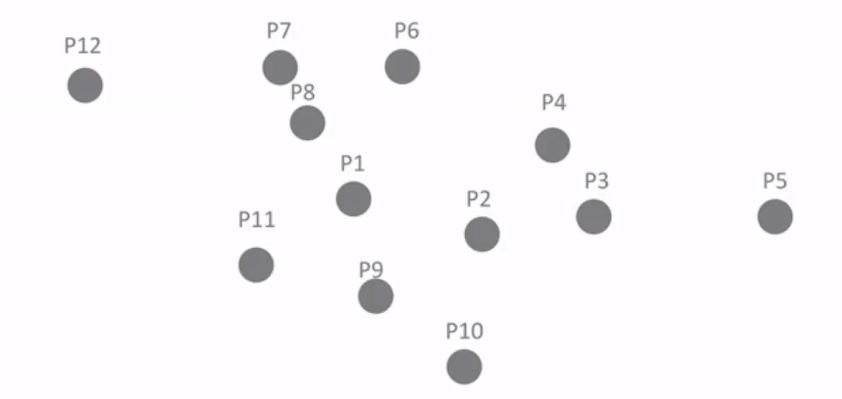

P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개
- 자신은 P1
- 이웃 데이터 : P2, P6, P7, P8, P9, P11
- 최소 이웃 데이터 5개 이상을 만족하므로
- P1 데이터는 핵심 포인트가 됨


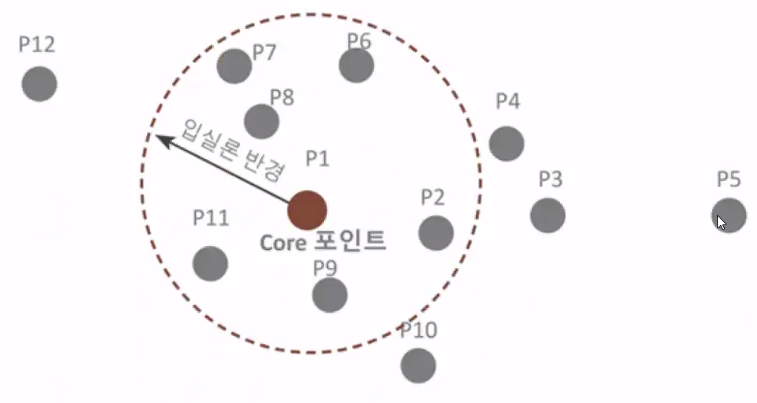

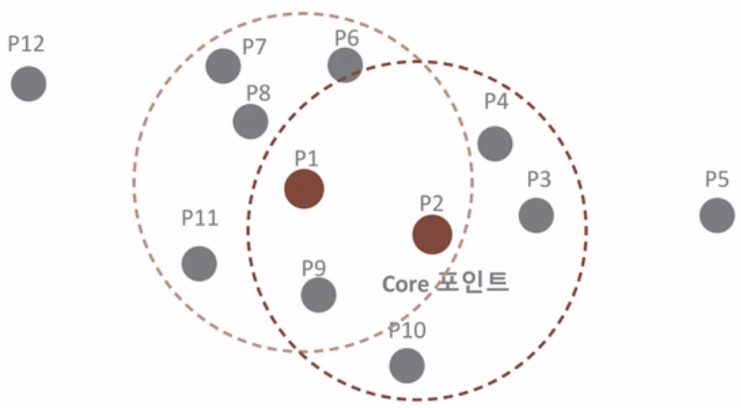

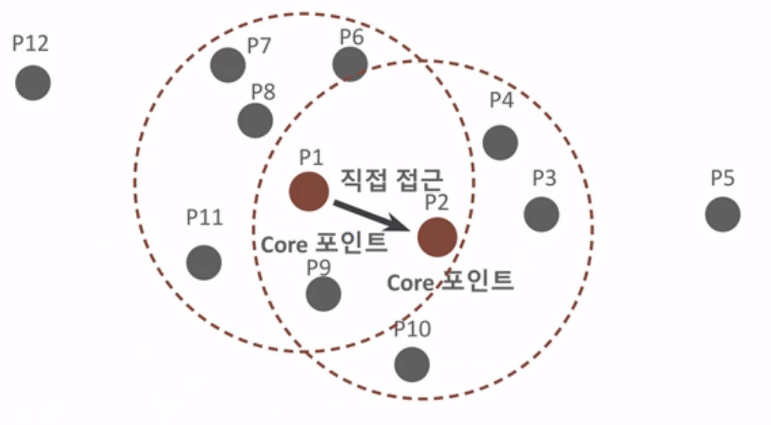

- 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화 구성
- 이러한 방식으로 점차적으로 군집(Cluster) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식

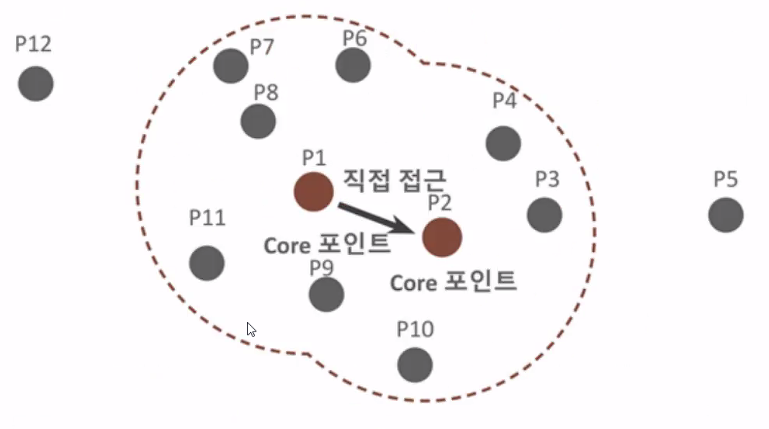

- P3 데이터의 경우
    - 반경 내에 포함되는 이웃 데이터는 P2, P4로 2개뿐이므로
    -군집으로 구분할 수 있는 핵심 포인트가 될 수 없음


- 이웃 데이터 중에 핵심 포인트인 P2를 가지고 있으므로
    - 경계 포인트가 됨


- 경계 포인트(Border Point)
    - 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만
    - 핵심 포인트를 이웃 포인트로 가지고 있는 데이터


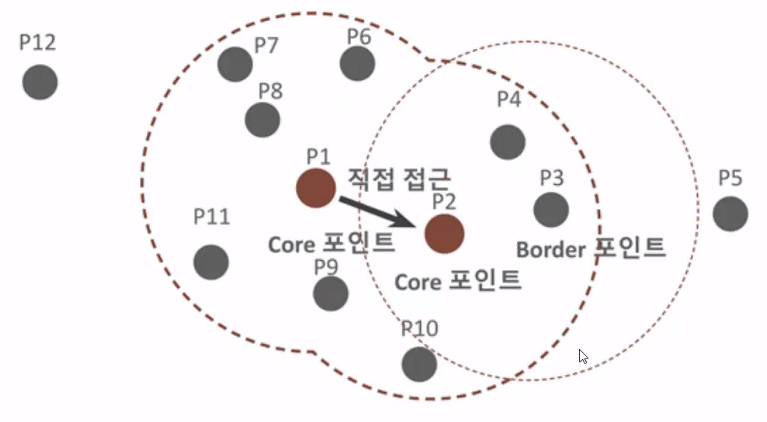

- P5 :  반경 내에 최소 데이터를 가지고 있지도 않고 이웃으로 핵심 포인트도 가지고 있는 않음
- 잡음 포인트가 됨

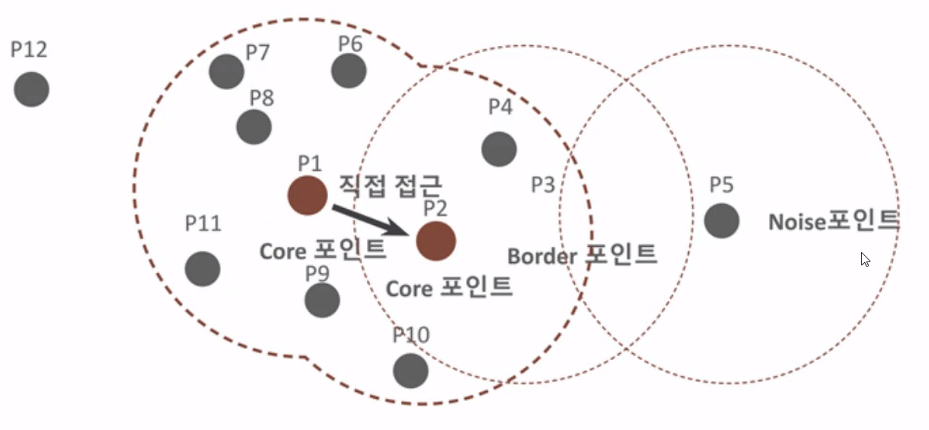

DBSCAN 정리
- 입실론 주변 영역의 최소 데이터 개수를 포함하는 
- 밀도 기준을 충족시키는 데이터인 
- 핵심 포인트를 연결하면서 군집화를 구성하는 방식

사이킷런 DBSCAN 클래스 사용
주요 초기 파라미터
- eps : 입실론 주변 영역의 반경
    - 일반적으로 eps 값으로는 1 이하의 값 설정
- min_samples : 핵심 포인트가 되기 위해 
    - 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수
    - 자신의 데이터 포함
    - min points + 1


### DBSCAN 예제
- iris 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 데이터 로드 

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**eps 0.6 min_samples=8로 DBSCAN 군집화 적용**

In [3]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [4]:
# euclidean 
# 유클리드 공간(Euclidean space)에서 
# 두 점 사이의 "보통의" 직선(straight-line) 거리(distance)
# 두 지점의 최단거리


In [5]:
irisDF['dbscan_cluster'] = dbscan_labels
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [6]:
irisDF['dbscan_cluster'].value_counts()

# -1 : 군집이 아닌 이상치를 의미

 1    88
 0    49
-1    13
Name: dbscan_cluster, dtype: int64

In [7]:
## 타겟별로 그룹 생성후cluster 별로 분류
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

#### dbscan_cluster 값 확인
- label 값 : 0, 1, -1
    - 0과 1 두개의 군집으로 그룹화 됨
    - -1 : 노이즈 군집

**타겟값의 유형이 3가인데 군집 결과가 2개의 군집 결과 나왔다고 해서 효율이 떨어지는 것은 아님**

### DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로
- DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 볼 수 있음


#### 결론
- iris 데이터셋은 군집을 3개로 한느 것보다 2래고 하는 것이 더 효율적

##### DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해
- PCA를 이용해 2개의 피처로 압축후 실시

In [8]:
# 클러스터 결과를 담은 DataFrame과 
# 사이킷런의 Cluster 객체등을 인자로 받아 
# 클러스터링 결과를 시각화하는 함수  

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                                    edgecolor='k', marker='$%d$' % label)
        if isNoise:
            legend_loc='upper center'
        else: 
            legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()


### pca 사용하여 차원 축소후 시각화

In [9]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 
# PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed[:5]


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

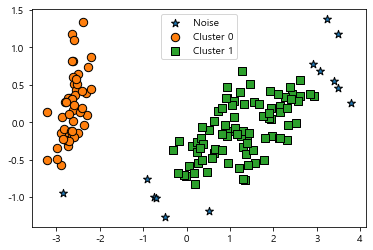

In [10]:
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


### 결과
- 별표(★)로 표현된 값은 모두 노이즈
    - PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러남

- DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
    - DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는게 중요

1. 일반적으로 eps의 값을 크게 하면 반경이 커져
    - 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐 
    

2. min_samples를 크게하면
    - 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로
        - 노이즈 데이터 개수가 늘어남
    - 데이터 밀도가 더 높아져야 하는데
        - 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문


In [11]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


In [12]:
## eps 값을 0.8로 증가
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [13]:
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


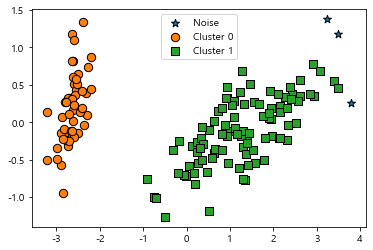

In [14]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


In [15]:
## min_samples=16으로 증가
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [16]:
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                45
        -1                 5
Name: dbscan_cluster, dtype: int64


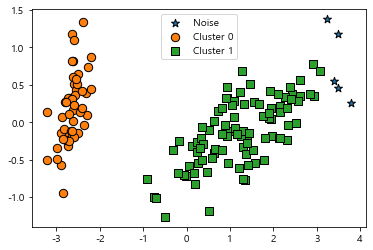

In [17]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


#### 복잡한 기하학적 분포를 가지는 데이터 세트에 
    - DBSCAN과 타 알고리즘 적용/비교


##### 복잡한 분포의 데이터 생성
- make_circles() 함수를 이용해서   
- 내부 원과 외부 원 형태로 구성된 2차원 데이터 세트 생성  
- make_circles() 함수는 2개의 피처만 생성하므로 별도의 피처 개수를 지정할 필요 없음  
- 파라미터 noise는 노이즈 데이터 세트의 비율  
- factor : 외부 원과 내부 원의 scale 비율


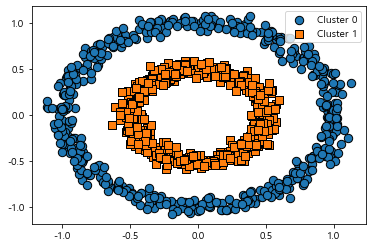

In [18]:
# make_circles() 함수를 이용해서   
# 내부 원과 외부 원 형태로 구성된 2차원 데이터 세트 생성  

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, 
                    noise=0.05, random_state=0, factor=0.5)

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


In [19]:
clusterDF.head()

,ftr1,ftr2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


In [20]:
### K-means 알고리즘
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

In [21]:
clusterDF.head()

,ftr1,ftr2,target,kmeans_cluster
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,0
3,0.316549,0.312730,1,1
4,-0.304804,0.407563,1,1


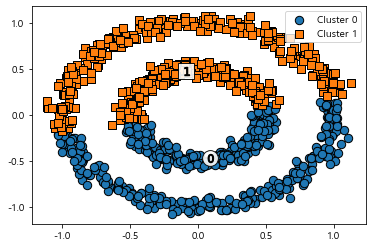

In [22]:
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


#### 결과 
- 위, 아래 군집 중심을 기반으로 위/아래  절반을  군집화함
- 거리기반 군집화로 데이터가 특정한 형태로 지속해서 이어지는 형태를 찾아내기 어려움

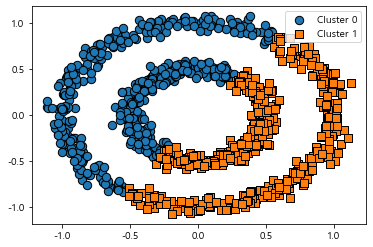

In [23]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

# GMM : 확률 기반 군집화


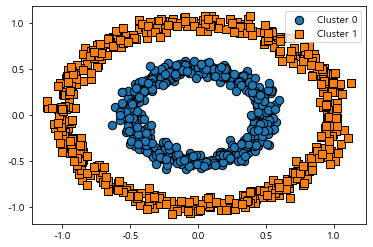

In [25]:
### DBSCAN으로 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')

dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)


### 결과
- 데이터의 기하학적 구조가 반영되면서 군집화가 이루어짐
- DBSCAN은 데이터의 구조가 기하학적으로 복잡한 데이터에서도 군집화 성능이 좋은 알고리즘
